# Largest circle within Gaussians

What is the largest circle you can inscribe between a positive and negative Gaussian function. 

A Gaussian function is described by 

$y = e^{-x^{2}}$ and $y = -e^{-x^{2}}$

0.9201342454571274


C:\Users\eee\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt
C:\Users\eee\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


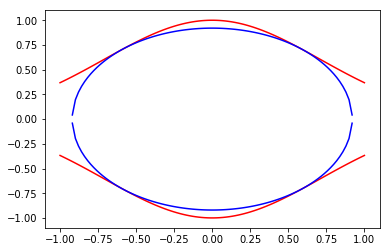

In [19]:
import numpy as np
import matplotlib.pyplot as plt

res = 100

x = np.linspace(-1, 1, num=res)
y_gauss_p = np.e **(-x*x)
y_gauss_n = - np.e **(-x*x)

# Functions used for rounding to high precision
omag      = lambda x: 10**np.floor(np.log10(np.abs(x)))
signifFig = lambda x, n: (np.around(x/omag(x),n)*omag(x))

# Number of significant figures to retain for optimization
sigfigs = 8

r = 0
r_low = 0.001
r_up = 1

counter = 0

cir_up = np.zeros((res,)) 
cir_down = np.zeros ((res,))

while True:
    # Take the radius of the circle as the midpoint of the search area
    r = r_low + ((r_up - r_low) / 2)

    # Calculate the points defining the circle
    x = np.linspace(-1, 1, num=res)
    cir_up = np.sqrt((r**2) - (x**2))
    cir_down = -np.sqrt((r**2) - (x**2))
    
    # Calculate the difference between the Gaussian lines and the circle
    diff = np.subtract(y_gauss_p,cir_up)
    
    # Update the search area based on the difference
    if len([i for i in diff if i < 0]) > 0: r_up = r
    else: r_low = r
    
    # If the past radius is equal to the current one then the algorithm has converged
    if 0 in np.subtract(signifFig(cir_up,sigfigs), signifFig(y_gauss_p,sigfigs)):
        break
        
print(r)
    
plt.plot(np.linspace(-1, 1, num=res), y_gauss_p, 'r')
plt.plot(np.linspace(-1, 1, num=res), y_gauss_n, 'r')
plt.plot(np.linspace(-1, 1, num=res), cir_up, 'b')
plt.plot(np.linspace(-1, 1, num=res), cir_down, 'b')
plt.show()